In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
from matplotlib import animation
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Setting up video encoder paths
ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

In [ ]:
#1. Solu muuttuu eläväksi, jos sen naapureista tasan kolme on eläviä.
#2. Solu pysyy elävänä, jos sen naapureista tasan 2 tai 3 on eläviä. Muuten solu kuolee.

In [ ]:
Size=10
world_array=np.random.choice([0, 1], size=(Size,Size))
kernel = np.ones((3,3), dtype=int)
kernel[1,1] = 0

In [11]:
class GameOfLife:
    def __init__(self,size):
        self.size=size
        self.steps=None
        
    def run(self,duration=10):
        # One game of life run
        steps=[]
        world_array=np.random.choice([0, 1], size=(self.size,self.size))
        kernel = np.ones((3,3), dtype=int)
        kernel[1,1] = 0
        for i in range(1,duration):
   
            world_array_previous=world_array.copy()
            steps.append(world_array_previous)
            # very clever way of checking cells neighbors with convolution (not my own invention :)
            neighbors_array = signal.convolve2d(world_array, kernel, mode="same",boundary='wrap')
            death_mask=np.logical_or(neighbors_array==2, neighbors_array==3) 
            birth_mask=neighbors_array==3
    
            np.place(world_array, death_mask, [0])
            np.place(world_array, birth_mask, [1])
            
           # plt.show()
            print(np.all(world_array_previous==world_array))
        self.steps=steps
        return steps


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


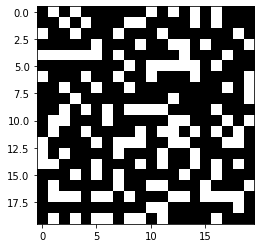

In [19]:
game=GameOfLife(size=20)
game.run(50)
steps=game.steps

In [14]:
steps[9]==steps[10]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
0


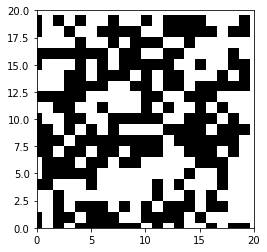

In [21]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))
#line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    ax.set_data([], [])
    return ax

# animation function.  This is called sequentially
def animate(i):
    frame=steps[i]
    print(i)
    size=frame.shape[0]
    #G is a NxNx3 matrix
    G = np.zeros((size,size,3))
    #Where we set the RGB for each pixel
    G[frame>0.5] = [0,0,0]
    G[frame<0.5] = [1,1,1]

    return ax.imshow(G,interpolation='nearest')

a=0.5
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=49, interval=500, blit=False)



FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
#C:\Users\arttu.lehtinen\Desktop
anim.save(os.path.join('C:/','Users\\arttu.lehtinen\\Desktop\\projektit','basic_animation.mp4'), writer = FFwriter)
#

plt.show()

In [23]:
HTML(anim.to_html5_video())